# Coursera & IBM Machine Learning - CLASSIFICATION Final Project
## Required
Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.

Sections required in your report:

* Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation and the benefits that your analysis provides to the business or stakeholders of this data.
* Brief description of the data set you chose, a summary of its attributes, and an outline of what you are trying to accomplish with this analysis.
* Brief summary of data exploration and actions taken for data cleaning and feature engineering.
* Summary of training at least three different classifier models, preferably of different nature in explainability and predictability. For example, you can start with a simple logistic regression as a baseline, adding other models or ensemble models. Preferably, all your models use the same training and test splits, or the same cross-validation method.
* A paragraph explaining which of your classifier models you recommend as a final model that best fits your needs in terms of accuracy and explainability.
* Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your classifier model.
* Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model after adding specific data features that may help you achieve a better explanation or a better prediction.

## Review criteria

Your peer will review your report from the perspective of a Chief Data Officer or the Head of Analytics and will assess whether your final linear regression went through all the necessary steps to achieve the main objective of your analysis.

Yes, you are expected to leverage a wide variety of tools, but this report should focus on presenting findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not a code review. Optionally, you can submit your code as a python notebook or as a print out in the appendix of your document.

The grading will center around __5 main points:__

* Does the report include a section describing the data?
* Does the report include a paragraph detailing the main objective(s) of this analysis?  
* Does the report include a section with variations of classifier models and specifies which one is the model that best suits the main objective(s) of this analysis?
* Does the report include a clear and well presented section with key findings related to the main objective(s) of the analysis?
* Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques? 

__Table of Contents__
1. Import Dataset
2. Data Quality Check & Encoding
3. Balancing the Dataset
4. Exploratory Data Analysis
5. Modelling and Optimizing Decision Tree
6. Modelling and Optimizing Random Forest Tree 
7. Scaling for Distance-Based Models
8. K-Nearest Neighbors
9. Linear Support Vector Machine
10. Final Evaluation

## 1. Import Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
# read data into pandas dataframe
df= pd.read_excel('default_of_credit_card_clients.xls', header=1)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [3]:
# remove ID and rename DEFAULT column
df.rename({'default payment next month':'DEFAULT'}, axis='columns', inplace=True)
df.drop('ID',axis=1,inplace=True)
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

## 2. Data Quality Check & Encoding
Checking for data types, duplicates, and missing values.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_0      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [5]:
# check for duplicates
df.duplicated(keep='first').sum()

35

In [6]:
# drop duplicates
df.drop_duplicates(keep='first',inplace=True)
df.shape

(29965, 24)

In [7]:
# double check for duplicates
df.duplicated(keep='first').sum()

0

In [8]:
# check categorical variables for missing values
cat_col = ['SEX', 'EDUCATION', 'MARRIAGE']
for col in cat_col:
    print(col,':', df[col].unique())

SEX : [2 1]
EDUCATION : [2 1 3 5 4 6 0]
MARRIAGE : [1 2 3 0]


In [9]:
# assume missing values have been entred as 0
# how many missing values
len(df.loc[(df['EDUCATION']==0) | (df['MARRIAGE']==0)])

68

In [10]:
# drop rows where EDUCATION or MARRIAGE = 0
df= df.loc[(df['EDUCATION'] != 0) & (df['MARRIAGE'] != 0)]
df.shape

(29897, 24)

In [11]:
# encode the ca
df = pd.get_dummies(df, columns=cat_col)
df.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT', 'SEX_1', 'SEX_2',
       'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3'],
      dtype='object')

## 3. Balancing the Dataset

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')
plt.rcParams.update({'font.size': 12})

In [13]:
# check the amount of paid-off vs defaulted
df['DEFAULT'].value_counts()

0    23272
1     6625
Name: DEFAULT, dtype: int64

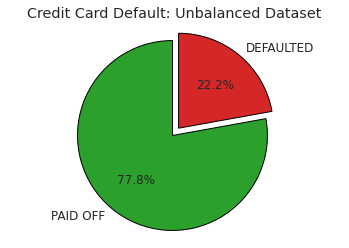

In [14]:
fig1, ax1 = plt.subplots()
ax1.pie(np.array(df['DEFAULT'].value_counts()),labels=['PAID OFF','DEFAULTED'],explode=(0,0.1),
        colors=['tab:green','tab:red'],autopct='%1.1f%%',startangle=90,wedgeprops={"edgecolor":"k"})
ax1.axis('equal')
plt.title('Credit Card Default: Unbalanced Dataset')
plt.show();

Given the size of the dataset, let's downsample both classes to a size of 2000 samples each. This will help to achieve higher classification performance scores and speed up computation during model fitting.

In [15]:
# split the dataset into paid-off and defaulted sets
df_paid_off= df[df['DEFAULT']==0]
df_defaulted= df[df['DEFAULT']==1]

In [16]:
from sklearn.utils import resample
# downsample majority class
sample_size=2000
df_paid_off_downsampled= resample(df_paid_off,
                                   replace=False,
                                   n_samples=sample_size,
                                   random_state=42)
len(df_paid_off_downsampled)

2000

In [17]:
# downsample minority class
df_defaulted_downsampled= resample(df_defaulted,
                                   replace=False,
                                   n_samples=sample_size,
                                   random_state=42)
len(df_defaulted_downsampled)

2000

In [18]:
df_downsampled= pd.concat([df_paid_off_downsampled, df_defaulted_downsampled])
df_downsampled.reset_index(inplace=True)
df_downsampled.drop('index',axis=1,inplace=True)
len(df_downsampled)

4000

In [19]:
df_downsampled['DEFAULT'].value_counts()

1    2000
0    2000
Name: DEFAULT, dtype: int64

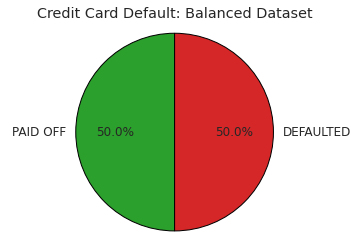

In [20]:
fig1, ax1 = plt.subplots()
ax1.pie(np.array(df_downsampled['DEFAULT'].value_counts()),labels=['PAID OFF','DEFAULTED'],
        colors=['tab:green','tab:red'],autopct='%1.1f%%',startangle=90,wedgeprops={"edgecolor":"k"})
ax1.axis('equal')
plt.title('Credit Card Default: Balanced Dataset')
plt.show();

## 4. Exploratory Data Analysis
* create X and y for original and sampled dataset
* correlation of X with y
* find biggest 2 Pearson r for decision boundary mapping perhaps
* compare limit_bal of downsample with original

In [21]:
# create an X & y from downsampled data as well as from original dataset
X_origin = df.drop('DEFAULT',axis=1).copy()
X_sampled = df_downsampled.drop('DEFAULT',axis=1).copy()
y_origin = df['DEFAULT'].copy()
y_sampled = df_downsampled['DEFAULT'].copy()
print(X_origin.shape, y_origin.shape)
print(X_sampled.shape, y_sampled.shape)

(29897, 31) (29897,)
(4000, 31) (29897,)


In [22]:
# compare correlations of X with y
corr_origin = X_origin.corrwith(y_origin)
corr_origin.sort_values(inplace=True)
corr_sampled = X_sampled.corrwith(y_sampled)
corr_sampled.sort_values(inplace=True)

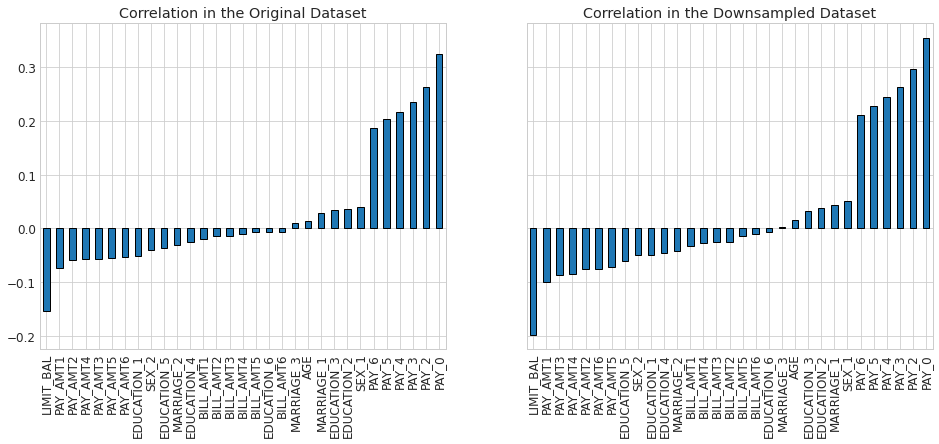

In [23]:
# compare correlations visually
fig, axs = plt.subplots(ncols=2, nrows=1, sharey=True, figsize=(16,6))
corr_origin.plot(kind='bar',ax=axs[0],edgecolor='k')
axs[0].set_title('Correlation in the Original Dataset')
corr_sampled.plot(kind='bar',ax=axs[1],edgecolor='k')
axs[1].set_title('Correlation in the Downsampled Dataset');

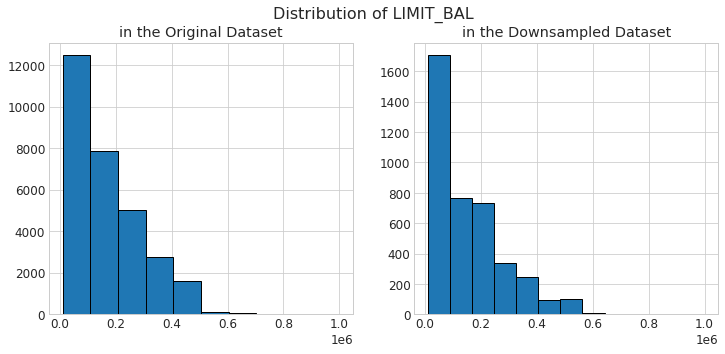

In [24]:
# compare distribution of LIMIT_BAL in original and sampled dataset
fig, axs = plt.subplots(ncols=2, nrows=1,sharex=True,figsize=(12,5))
fig.suptitle('Distribution of LIMIT_BAL', fontsize=16)
axs[0].hist(df['LIMIT_BAL'],edgecolor='k')
axs[0].set_title('in the Original Dataset')
axs[1].hist(df_downsampled['LIMIT_BAL'],edgecolor='k')
axs[1].set_title('in the Downsampled Dataset');

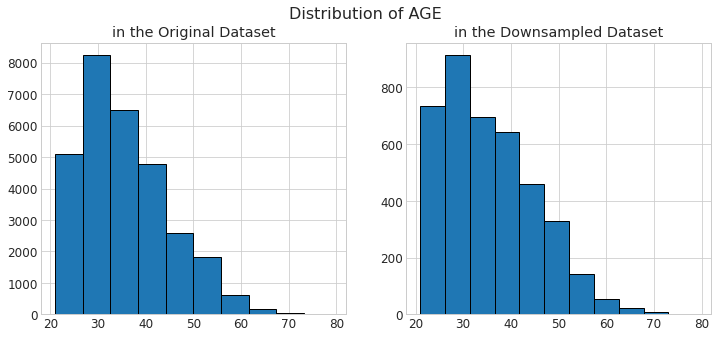

In [25]:
# compare distribution of AGE in original and sampled dataset
fig, axs = plt.subplots(ncols=2, nrows=1,sharex=True,figsize=(12,5))
fig.suptitle('Distribution of AGE', fontsize=16)
axs[0].hist(df['AGE'],edgecolor='k')
axs[0].set_title('in the Original Dataset')
axs[1].hist(df_downsampled['AGE'],edgecolor='k')
axs[1].set_title('in the Downsampled Dataset');

## 5. Modelling and Optimizing Decision Tree

In [26]:
!pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in /home/jupyterlab/conda/envs/python/lib/python3.6/site-packages (0.24.1)


In [27]:
import sklearn
print(sklearn.__version__)

0.24.1


In [28]:
# split the data into train-test split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit, GridSearchCV
# do stratified kfold split for later cross validation
kf = StratifiedKFold(shuffle=True, random_state=42, n_splits=4)

# do a simple stratified split for decision tree pruning
strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
train_idx, test_idx = next(strat_shuff_split.split(X_sampled, y_sampled))
X_train = X_sampled.iloc[train_idx]
y_train = y_sampled[train_idx]
X_test = X_sampled.iloc[test_idx]
y_test = y_sampled[test_idx]

In [29]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
# find best decision tree classifier
ccp_alphas = np.geomspace(0.0001,0.1,4)
clf_dt = DecisionTreeClassifier(random_state=42)
params = {'ccp_alpha': ccp_alphas}

grid = GridSearchCV(clf_dt, params, cv=kf,scoring='f1')
grid.fit(X_sampled, y_sampled)
y_pred=grid.predict(X_sampled)
best_DT_metrics = [accuracy_score(y_sampled,y_pred), precision_score(y_sampled,y_pred), recall_score(y_sampled,y_pred), f1_score(y_sampled,y_pred)]
print(grid.best_params_)
print(best_DT_metrics)

{'ccp_alpha': 0.001}
[0.75325, 0.7521154803384769, 0.7555, 0.7538039411324519]


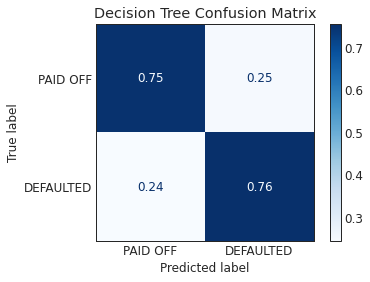

In [30]:
sns.set_style('white')
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(grid.best_estimator_,X_sampled,y_sampled,normalize='true',                    
                     display_labels=['PAID OFF','DEFAULTED'],
                     cmap='Blues');
plt.title('Decision Tree Confusion Matrix');

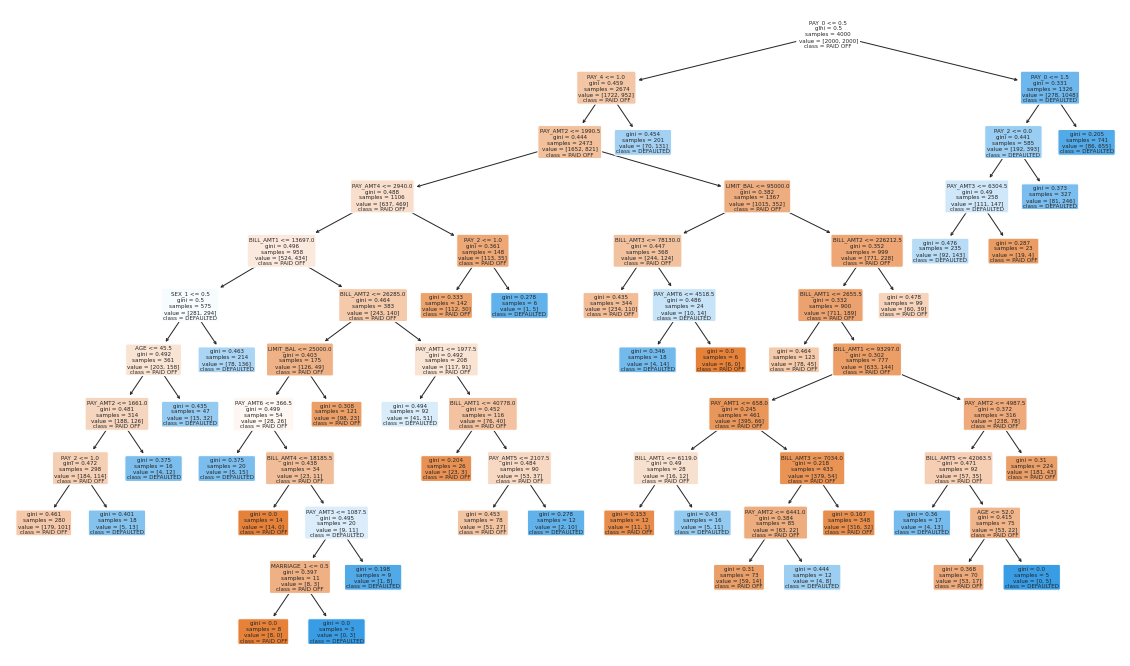

In [31]:
plt.figure(figsize=(20,12))
plot_tree(grid.best_estimator_,
         filled=True,
         rounded=True,
         class_names=['PAID OFF','DEFAULTED'],
         feature_names=X_sampled.columns);

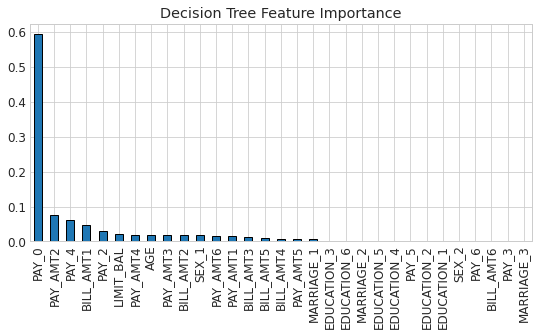

In [32]:
sns.set_style('whitegrid')
feat_imp = pd.DataFrame(grid.best_estimator_.feature_importances_,index=X_sampled.columns,columns=['size'])
feat_imp.sort_values(by=['size'],ascending=False,inplace=True)
feat_imp.plot(kind='bar',edgecolor='k',figsize=(9,4),legend=False);
plt.title('Decision Tree Feature Importance');

## 6. Modelling and Optimizing Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(random_state=42,warm_start=True,n_jobs=-1)
n_est = [10,50,100,200,300]
n_feat = [2,  3,  4,  5,  6, 'sqrt', 'log2']

params = {'n_estimators': n_est,
         'max_features': n_feat}

grid = GridSearchCV(clf_rf, params, cv=kf, scoring='f1')
grid.fit(X_sampled, y_sampled)
y_pred=grid.predict(X_sampled)
best_RF_metrics = [accuracy_score(y_sampled,y_pred), precision_score(y_sampled,y_pred), recall_score(y_sampled,y_pred), f1_score(y_sampled,y_pred)]
print(grid.best_params_)
print(best_RF_metrics)

{'max_features': 2, 'n_estimators': 300}
[0.99975, 0.9995002498750625, 1.0, 0.9997500624843789]


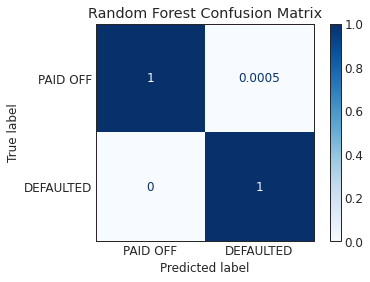

In [34]:
sns.set_style('white')
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(grid.best_estimator_,X_sampled,y_sampled,normalize='true',                    
                     display_labels=['PAID OFF','DEFAULTED'],
                     cmap='Blues');
plt.title('Random Forest Confusion Matrix');

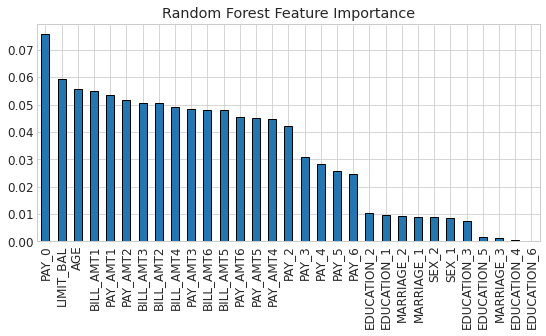

In [35]:
sns.set_style('whitegrid')
feat_imp = pd.DataFrame(grid.best_estimator_.feature_importances_,index=X_sampled.columns,columns=['size'])
feat_imp.sort_values(by=['size'],ascending=False,inplace=True)
feat_imp.plot(kind='bar',edgecolor='k',figsize=(9,4),legend=False);
plt.title('Random Forest Feature Importance');

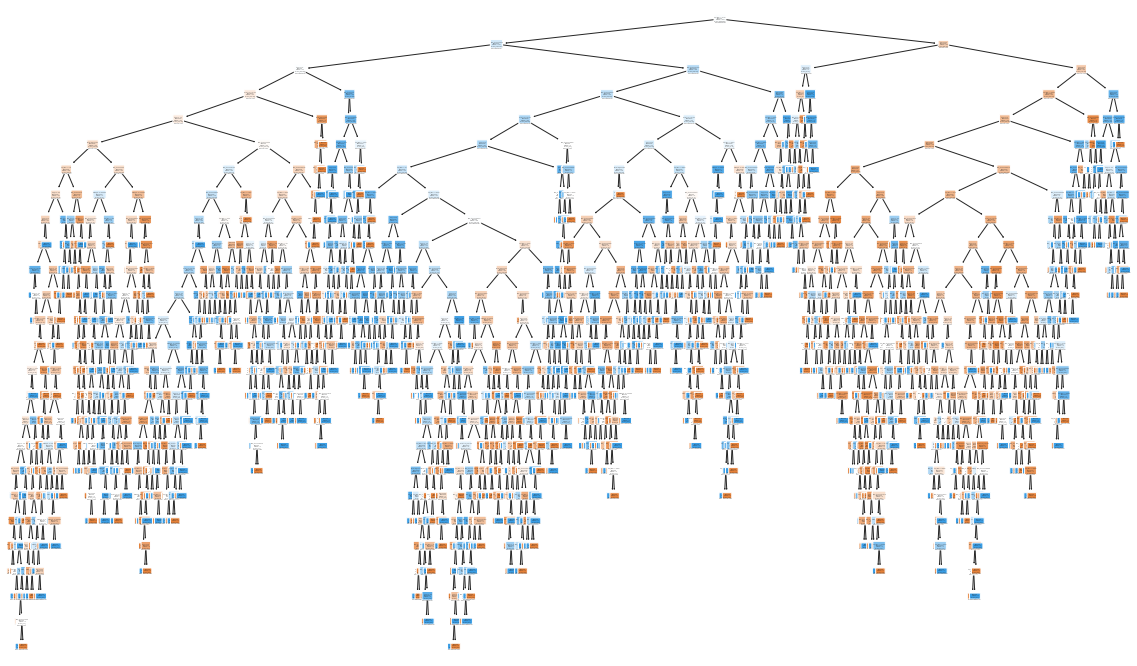

In [36]:
plt.figure(figsize=(20,12))
plot_tree(grid.best_estimator_.estimators_[0],
         filled=True,
         rounded=True,
         class_names=['PAID OFF','DEFAULTED'],
         feature_names=X_sampled.columns);

## 7. K-Nearest Neighbors

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
# number of neighbors chosen as odd number to enable majority vote on binary label
n_est = [3,5,7,9,11,13,15]

knn_estimator = Pipeline([
        ("scaler", StandardScaler()),
        ("knn_classifier", KNeighborsClassifier(n_jobs=-1))])

params={'knn_classifier__n_neighbors':n_est,}

grid = GridSearchCV(knn_estimator, params, cv=kf,scoring='f1')
grid.fit(X_sampled, y_sampled)
y_pred=grid.predict(X_sampled)
best_KNN_metrics = [accuracy_score(y_sampled,y_pred), precision_score(y_sampled,y_pred), recall_score(y_sampled,y_pred), f1_score(y_sampled,y_pred)]
print(grid.best_params_)
print(best_KNN_metrics)

{'knn_classifier__n_neighbors': 7}
[0.74525, 0.7830351990767456, 0.6785, 0.7270291990356281]


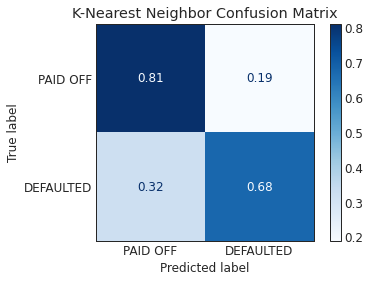

In [38]:
sns.set_style('white')
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(grid.best_estimator_,X_sampled,y_sampled,normalize='true',                    
                     display_labels=['PAID OFF','DEFAULTED'],
                     cmap='Blues');
plt.title('K-Nearest Neighbor Confusion Matrix');

## 9. Linear Support Vector Machine

In [39]:
from sklearn.svm import LinearSVC, SVC
C_penalty = np.geomspace(0.001,10,5)

SVC_estimator = Pipeline([
        ("scaler", StandardScaler()),
        ("SVC", SVC(random_state=42))])

params={'SVC__C': C_penalty,
        'SVC__kernel': ['linear','rbf']}

grid = GridSearchCV(SVC_estimator, params, cv=kf,scoring='f1')
grid.fit(X_sampled, y_sampled)
y_pred=grid.predict(X_sampled)
best_SVC_metrics = [accuracy_score(y_sampled,y_pred), precision_score(y_sampled,y_pred), recall_score(y_sampled,y_pred), f1_score(y_sampled,y_pred)]
print(grid.best_params_)
print(best_SVC_metrics)

{'SVC__C': 1.0, 'SVC__kernel': 'rbf'}
[0.72975, 0.7936102236421725, 0.621, 0.6967741935483871]


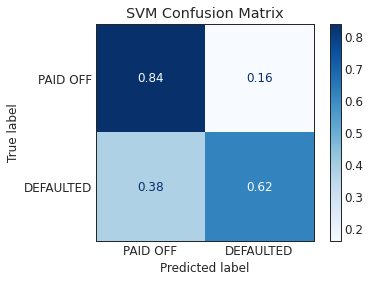

In [40]:
sns.set_style('white')
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(grid.best_estimator_,X_sampled,y_sampled,normalize='true',                    
                     display_labels=['PAID OFF','DEFAULTED'],
                     cmap='Blues');
plt.title('SVM Confusion Matrix');

## 10. Final Evaluation

In [41]:
# model evaluation table
model_eval= pd.DataFrame(best_DT_metrics, index=['Accuracy','Precision','Recall','F1-Score'])
model_eval.columns = ['Decision Tree']
model_eval.insert(loc=1, column='Random Forest', value=best_RF_metrics)
model_eval.insert(loc=2, column='K-Nearest Neighbor', value=best_KNN_metrics)
model_eval.insert(loc=3, column='Support Vector Machine', value=best_SVC_metrics)
model_eval

,Decision Tree,Random Forest,K-Nearest Neighbor,Support Vector Machine
Accuracy,0.753250,0.99975,0.745250,0.729750
Precision,0.752115,0.99950,0.783035,0.793610
Recall,0.755500,1.00000,0.678500,0.621000
F1-Score,0.753804,0.99975,0.727029,0.696774
